In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statistics import median


In [3]:
data = pd.read_csv('My_Superstore.csv')
data.head()

,Category,City,Container,Country / Region,Customer Name,Customer Segment,Customer_ID,Department,Discount,Item,...,Profit,Region,Row,Sales,Ship Date,Ship Mode,Shipping Cost,State,SubRegion,Unit Price
0,Storage & Organization,Suva,Small Box,Fiji,Joy Corbett,Small Business,1656,Office Supplies,10.00%,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 1...",...,$106,AsiaPac,1,$173,1/2/2010 12:00:00 AM,Regular Air,5,Central,NaN,6
1,Storage & Organization,Bowie,Large Box,United States of America,Anita Hahn,Home Office,2211,Office Supplies,8.00%,Safco Industrial Wire Shelving,...,$46,North America,2,$177,1/3/2010 12:00:00 AM,Express Air,35,Maryland,East,96
2,Binders and Binder Accessories,Los Angeles,Small Box,United States of America,Ernest Oh,Consumer,949,Office Supplies,6.00%,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",...,$34,North America,3,$116,1/4/2010 12:00:00 AM,Regular Air,3,California,West,41
3,Chairs & Chairmats,New York City,Jumbo Drum,United States of America,Scott Bunn,Corporate,68,Furniture,0.00%,Hon 4070 Series Pagoda™ Armless Upholstered St...,...,$605,North America,4,"$1,168",1/2/2010 12:00:00 AM,Delivery Truck,49,New York,East,292
4,Chairs & Chairmats,New York City,Jumbo Drum,United States of America,Scott Bunn,Corporate,68,Furniture,7.00%,Hon Valutask™ Swivel Chairs,...,"$2,648",North America,5,"$4,039",1/4/2010 12:00:00 AM,Delivery Truck,45,New York,East,101


## 1. Data review and cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16798 entries, 0 to 16797
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             16798 non-null  object 
 1   City                 16798 non-null  object 
 2   Container            16798 non-null  object 
 3   Country / Region     16798 non-null  object 
 4   Customer Name        16798 non-null  object 
 5   Customer Segment     16798 non-null  object 
 6   Customer_ID          16798 non-null  int64  
 7   Department           16798 non-null  object 
 8   Discount             16798 non-null  object 
 9   Item                 16798 non-null  object 
 10  Number of Records    16798 non-null  int64  
 11  Order Date           16798 non-null  object 
 12  Order Priority       16798 non-null  object 
 13  Order Quantity       16798 non-null  int64  
 14  Order                16798 non-null  int64  
 15  Postal Code          9813 non-null  

Some internal remarks. 

The Postal Code has float64 type whereas it has to be an object (or integer somehow) because the code shows only the charectiristic but not the quantity. The similar situation is with Customer ID feature.

However, the Discount can be written as float64 to be used in further equatations. Profit and Sales have to be typed as float too by the same reason. 

It is not clear what does the Unit Price mean. So, maybe it might be the object too.

We have also check the presence of abcent values (NaN) in our dataset:

In [5]:
data.isnull().sum()

Category                  0
City                      0
Container                 0
Country / Region          0
Customer Name             0
Customer Segment          0
Customer_ID               0
Department                0
Discount                  0
Item                      0
Number of Records         0
Order Date                0
Order Priority            0
Order Quantity            0
Order                     0
Postal Code            6985
Product Base Margin       0
Profit                    0
Region                    0
Row                       0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
SubRegion              7316
Unit Price                0
dtype: int64

We see the Postal Code has 6985 Nan values, the SubRegion has 7316 Nan values. The standard simple way of solving this problem is to replace NaN with zero. However it can cause some metrics offset and wrong prediction results in future. The common strategy (without any complex algorithms) is to replace NaNs with mean or median value of the feature. As for me, it is better to use the median as it provides the same weightening of values at the column.

Let us begin with Postal Code column. This column has the type float64 but internally it is like label, ID or some name. That is why the logic of  mean or median is not applicable here. Simply, we will not use any quantitative metric for this feature. The type of this column has to be an object, all the factors are usually marked with this type.

We know that there are 9813 values (not NaN) at Postal Code column. It is important to review wether all these codes are of float64 type or not.

In [6]:
def wrong_type(df, column_name, right_value_type):
    col=0
    mistake = []
    for j in range(len(df)):
            val = df.loc[j, column_name]
            if pd.isnull(val) == False:
                if type(val) != right_value_type: 
                    col+=1
                    print(type(val))
                    print(f'Значение: {val}, строка: {j}')
                    if val in mistake:
                        pass
                    else: 
                        mistake.append(val)
                else:
                    continue
    return col

In [7]:
pcode_type = wrong_type(data, 'Postal Code', np.float64)
pcode_type

0

We see that there is no valuse of different type. We can change the type now.

In [8]:
data['Postal Code']=data['Postal Code'].astype('object')
data['Postal Code']

0          NaN
1        20715
2        90049
3        10177
4        10177
         ...  
16793    94533
16794      NaN
16795    60174
16796    14120
16797    14120
Name: Postal Code, Length: 16798, dtype: object

So, the Postal Code values are the objects now.

We can decide that a postal code equal to 'no' will be equivalent to the abcent meaning. 

In [9]:
data['Postal Code'].fillna('no', inplace = True)
data['Postal Code']

0           no
1        20715
2        90049
3        10177
4        10177
         ...  
16793    94533
16794       no
16795    60174
16796    14120
16797    14120
Name: Postal Code, Length: 16798, dtype: object

Let us check the Customer_ID values for type uniformity too. Then we will change the type.

In [10]:
id_type = wrong_type(data, 'Customer_ID', np.int64)
id_type

0

In [11]:
data['Customer_ID'] = data['Customer_ID'].astype('object')
data['Customer_ID']

0        1656
1        2211
2         949
3          68
4          68
         ... 
16793    3265
16794    2275
16795    1090
16796    2277
16797    2277
Name: Customer_ID, Length: 16798, dtype: object

The Discount, Profit and Sales features contains the numerical values. The symbols like $ or % can be written only as the string values. That is why I will delete them.

In [12]:
data.rename(columns={'Discount':'Discount%'}, inplace=True)

In [13]:
data['Discount%']=data['Discount%'].replace('%','',regex=True).astype(float)
data['Discount%']

0        10.0
1         8.0
2         6.0
3         0.0
4         7.0
         ... 
16793    10.0
16794     6.0
16795     3.0
16796     6.0
16797     0.0
Name: Discount%, Length: 16798, dtype: float64

In [14]:
data['Discount%'].value_counts()

1.0     1599
5.0     1564
3.0     1547
9.0     1543
4.0     1525
8.0     1518
2.0     1518
0.0     1501
10.0    1477
6.0     1457
7.0     1409
95.0     130
11.0       2
17.0       2
25.0       2
21.0       2
16.0       2
Name: Discount%, dtype: int64

In [15]:
data.rename(columns={'Profit':'Profit$'}, inplace=True)

In [16]:
data['Profit$']= data['Profit$'].replace('\\(','',regex=True)
data['Profit$']= data['Profit$'].replace('\\)','',regex=True)
data['Profit$']=data['Profit$'].map(lambda x: str(x).lstrip('$').rstrip('$'))
data['Profit$']= data['Profit$'].replace(',','',regex=True)

In [17]:
data['Profit$']=data['Profit$'].astype(float)

In [18]:
pd.unique(data['Profit$']).tolist()

[106.0,
 46.0,
 34.0,
 605.0,
 2648.0,
 2671.0,
 43.0,
 198.0,
 9.0,
 663.0,
 49.0,
 47.0,
 117.0,
 163.0,
 56.0,
 417.0,
 10.0,
 58.0,
 11.0,
 8.0,
 25.0,
 111.0,
 1.0,
 121.0,
 65.0,
 13.0,
 45.0,
 549.0,
 2.0,
 54.0,
 60.0,
 1308.0,
 147.0,
 2351.0,
 4887.0,
 530.0,
 42.0,
 300.0,
 146.0,
 1602.0,
 19.0,
 352.0,
 551.0,
 1176.0,
 632.0,
 72.0,
 381.0,
 38.0,
 2505.0,
 720.0,
 36.0,
 17.0,
 22.0,
 406.0,
 15284.0,
 68.0,
 1358.0,
 4.0,
 6.0,
 631.0,
 178.0,
 18.0,
 3.0,
 104.0,
 7.0,
 4043.0,
 328.0,
 690.0,
 736.0,
 167.0,
 77.0,
 1183.0,
 200.0,
 214.0,
 227.0,
 31.0,
 95.0,
 0.0,
 1864.0,
 5.0,
 295.0,
 35.0,
 63.0,
 66.0,
 69.0,
 15.0,
 80.0,
 397.0,
 7870.0,
 881.0,
 296.0,
 495.0,
 114.0,
 1076.0,
 286.0,
 1916.0,
 219.0,
 27.0,
 243.0,
 70.0,
 3636.0,
 2905.0,
 392.0,
 109.0,
 44.0,
 948.0,
 715.0,
 88.0,
 2067.0,
 630.0,
 255.0,
 903.0,
 9131.0,
 488.0,
 23.0,
 142.0,
 2209.0,
 213.0,
 724.0,
 51.0,
 1330.0,
 218.0,
 29.0,
 99.0,
 3774.0,
 57.0,
 302.0,
 3706.0,
 130.0,
 12.0

In [19]:
data.rename(columns={'Sales':'Sales$'}, inplace=True)

In [20]:
data['Sales$']= data['Sales$'].replace('\\(','',regex=True)
data['Sales$']= data['Sales$'].replace('\\)','',regex=True)
data['Sales$']=data['Sales$'].map(lambda x: str(x).lstrip('$').rstrip('$'))
data['Sales$']= data['Sales$'].replace(',','',regex=True)
data['Sales$']=data['Sales$'].astype(float)
data['Sales$']

0         173.0
1         177.0
2         116.0
3        1168.0
4        4039.0
          ...  
16793     211.0
16794     244.0
16795    3162.0
16796      61.0
16797     123.0
Name: Sales$, Length: 16798, dtype: float64

Moreover, 2 columns which had to be dates are actually objects. Let us change this.

In [21]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [22]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [23]:
data['Order Date']

0       2010-01-01
1       2010-01-01
2       2010-01-02
3       2010-01-02
4       2010-01-02
           ...    
16793   2013-12-30
16794   2013-12-31
16795   2013-12-31
16796   2013-12-31
16797   2013-12-31
Name: Order Date, Length: 16798, dtype: datetime64[ns]

We see that data type was changed to datetime64

Let us review the values in each column wether there are some mistakes or absent values.

In [24]:
data['Category'].value_counts()

Paper                             2450
Binders and Binder Accessories    1830
Telephones and Communication      1766
Office Furnishings                1576
Computer Peripherals              1516
Pens & Art Supplies               1266
Storage & Organization            1092
Appliances                         868
Chairs & Chairmats                 772
Tables                             722
Office Machines                    674
Labels                             576
Envelopes                          492
Bookcases                          378
Rubber Bands                       358
Scissors, Rulers and Trimmers      288
Copiers and Fax                    174
Name: Category, dtype: int64

In [25]:
l = list()
l.append(data['City'].value_counts())
pd.set_option('display.max_rows', None)
print(l[0])

Guangzhou              357
Buenos Aires           341
Seoul                  292
Tokyo                  286
Paris                  248
Beijing                245
Mexico City            241
Cairo                  238
Rio de Janeiro         232
Sao Paulo              226
Osaka                  213
New York City          202
Los Angeles            196
Moscow                 187
Jakarta                178
Karachi                165
Jalandhar              160
Shanghai               155
Lagos                  142
Manila                 135
Istanbul               131
Kolkata                128
Delhi                  126
Guadalajara            100
Seattle                 93
Chicago                 90
Rome                    85
Boston                  80
Hyderabad               80
Addis Ababa             78
Warsaw                  77
Lima                    70
BogotÃ¡                 69
Washington              68
Singapore               68
Wuhan                   66
Geneva                  65
D

In [26]:
pd.reset_option('display.max_rows')

There is no misprints visually. However, we always can check the names of the cities using some list of cities and nltk library.

In [27]:
data['Container'].value_counts()

Small Box     8694
Wrap Bag      2336
Small Pack    1912
Jumbo Drum    1248
Jumbo Box     1064
Large Box      812
Medium Box     732
Name: Container, dtype: int64

In [28]:
data['Country / Region'].value_counts()

United States of America    9426
China                       1257
India                        746
Brazil                       672
Japan                        507
Mexico                       388
Argentina                    341
Republic of Korea            325
Egypt                        265
France                       242
Pakistan                     212
Russian Federation           188
Indonesia                    186
Nigeria                      152
Turkey                       145
Philippines                  135
Saudi Arabia                 113
Colombia                     107
Italy                         86
United Kingdom                84
Ethiopia                      78
Poland                        77
Spain                         71
Singapore                     68
Switzerland                   65
Peru                          63
South Africa                  58
Canada                        56
Germany                       51
Ireland                       50
Chile     

In [29]:
pd.set_option('display.max_rows', None)
data['State'].value_counts()

California                             1021
Texas                                   646
Illinois                                584
New York                                574
Florida                                 522
Guangdong Sheng                         417
Ohio                                    396
Province de Buenos Aires                341
Michigan                                327
Washington                              327
Soul                                    292
Tokyo                                   286
Pennsylvania                            271
Distrito Federal                        262
North Carolina                          251
Beijing                                 245
Île-de-France                           242
Indiana                                 241
Minnesota                               239
Al Qahirah                              238
Rio de Janeiro                          232
São Paulo                              226
Massachusetts                   

In [30]:
pd.reset_option('display.max_rows', None)

Everything is okay visually too.

In [31]:
data['Customer Name'].value_counts()

Rosemary Hedrick         41
Sylvia Barr              38
Jason Fink               35
Courtney McBride         33
Annie Rouse              30
                         ..
Peter Creech              1
Doris Tyson               1
David Powell              1
Tamara Bartlett Cheek     1
Rita Barton               1
Name: Customer Name, Length: 3403, dtype: int64

In [32]:
data['Customer Segment'].value_counts()

Corporate         6152
Home Office       4064
Consumer          3298
Small Business    3284
Name: Customer Segment, dtype: int64

In [33]:
data['Department'].value_counts()

Office Supplies    9220
Technology         4130
Furniture          3448
Name: Department, dtype: int64

In [34]:
data['Order Priority'].value_counts()

High             3536
Low              3440
Not Specified    3344
Medium           3262
Critical         3216
Name: Order Priority, dtype: int64

In [35]:
data['Region'].value_counts()

North America    9482
AsiaPac          3802
EMEA             1894
Latam            1620
Name: Region, dtype: int64

In [36]:
data['Ship Mode'].value_counts()

Regular Air       12540
Delivery Truck     2292
Express Air        1966
Name: Ship Mode, dtype: int64

We have some columns with numerical values. Let us check them for the type uniformity.

In [37]:
rec_type = wrong_type(data, 'Number of Records', np.int64)
rec_type

0

In [38]:
quan_type = wrong_type(data, 'Order Quantity', np.int64)
quan_type

0

In [39]:
marg_type = wrong_type(data, 'Product Base Margin', np.float64)
marg_type

0

In [40]:
row_type = wrong_type(data, 'Row', np.int64)
row_type

0

In [41]:
sh_type = wrong_type(data, 'Shipping Cost', np.int64)
sh_type

0

In [42]:
unitp_type = wrong_type(data, 'Unit Price', np.int64)
unitp_type

0

In [43]:
order_type = wrong_type(data, 'Order', np.int64)
order_type

0

There are no values of wrong type at Customer_ID, Order, Number of Records, Order Quantity, Product Base Margin, Row, Shipping Cost, Unit Price columns

The Row column mean the index, so it has to be a factor. 

In [44]:
data['Row'] = data['Row'].astype('object')
data['Row']

0            1
1            2
2            3
3            4
4            5
         ...  
16793    16794
16794    16795
16795    16796
16796    16797
16797    16798
Name: Row, Length: 16798, dtype: object

It's not clear what Order feature means.

In [45]:
data['Number of Records'].value_counts()

1    16798
Name: Number of Records, dtype: int64

Actually, the Number of Records feature has no sense as it contain the same value for each row (1). That is why I decide to remove the column.

In [46]:
data.drop('Number of Records', axis=1, inplace=True)

Now we have to replace the NaN values at SubRegion feature and check the column for mistakes.

In [47]:
data['SubRegion'].value_counts()

Central    2899
East       2289
West       2284
South      1954
Canada       56
Name: SubRegion, dtype: int64

So, SubRegion is a categorical value. There are no any strange categories, so that the only problem is the abcent values. Here we can change them for 'Unknown' value.

In [48]:
data['SubRegion'].fillna('Unknown', inplace = True)
data['SubRegion']

0        Unknown
1           East
2           West
3           East
4           East
          ...   
16793       West
16794    Unknown
16795    Central
16796       East
16797       East
Name: SubRegion, Length: 16798, dtype: object

## 2. Визуальное представление и характеристики.

ПОСМОТРЕТЬ РАСПРЕДЕЛЕНИЯ

ВОЗМОЖНЫЕ ЗАВИСИМОСТИ? 

In [49]:
data.describe()

,Discount%,Order Quantity,Order,Product Base Margin,Profit$,Sales$,Shipping Cost,Unit Price
count,16798.000000,16798.000000,16798.000000,16798.000000,16798.000000,16798.000000,16798.000000,16798.000000
mean,5.663293,26.219848,59334.677223,0.500638,897.046256,1790.082093,12.857007,89.330158
std,8.502774,27.184655,31827.183249,0.153102,2349.925239,4645.264802,17.253488,290.342578
min,0.000000,1.000000,3.000000,0.036000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,8.000000,29857.750000,0.380000,31.000000,90.000000,3.000000,6.000000
50%,5.000000,16.000000,72895.500000,0.510000,140.000000,336.000000,6.000000,21.000000
75%,8.000000,38.000000,88699.000000,0.590000,671.000000,1391.000000,14.000000,86.000000
max,95.000000,288.000000,91591.000000,0.850000,60251.000000,99130.000000,165.000000,6783.000000


Let us investigate the Pearson correlation coeffitient through the correlation matrix:

In [50]:
data.corr()

,Discount%,Order Quantity,Order,Product Base Margin,Profit$,Sales$,Shipping Cost,Unit Price
Discount%,1.000000,-0.047286,0.065503,0.091460,-0.016948,-0.037369,0.198800,0.035669
Order Quantity,-0.047286,1.000000,-0.529181,-0.005334,0.375777,0.367162,-0.009004,-0.055980
Order,0.065503,-0.529181,1.000000,-0.004970,-0.217680,-0.219512,-0.001040,-0.000786
Product Base Margin,0.091460,-0.005334,-0.004970,1.000000,0.224469,0.068312,0.303873,-0.016797
Profit$,-0.016948,0.375777,-0.217680,0.224469,1.000000,0.897967,0.366944,0.299654
Sales$,-0.037369,0.367162,-0.219512,0.068312,0.897967,1.000000,0.321137,0.456683
Shipping Cost,0.198800,-0.009004,-0.001040,0.303873,0.366944,0.321137,1.000000,0.239272
Unit Price,0.035669,-0.055980,-0.000786,-0.016797,0.299654,0.456683,0.239272,1.000000


We see that coeffitients are rather low. There only one stron correlation between the Sales and the Profit (0.898), the Unit Price and the Sales possibly correlate(0.46), and the low correlation is possible between the Order Quantity and the Profit (0.38), the Sales (0.37), between the Product Base Margin and the Shipping Cost (0.3), between the Shipping Cost and the Profit (0.37) and the Sales (0.32), between the Unit Price and the Profit.

So, we can suppose that Sales causes the greater demand. The Sales possibly cause the growth of the Order Quantity what lead to the growth of the Profit. The Shipping Cost influence on the Profit growth or possible sales.

Let us see the Profit distribution according to Category:

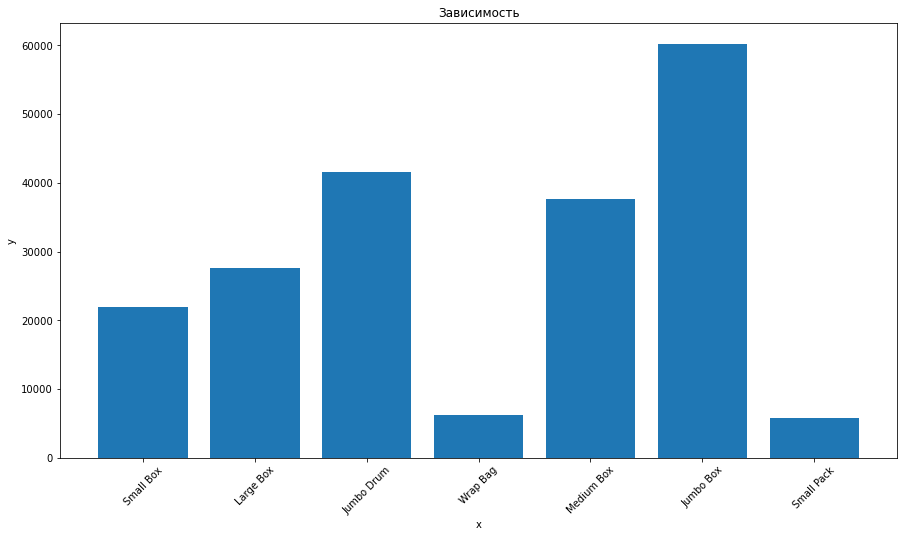

In [51]:
plt.figure(figsize=(15, 8))
plt.title("Зависимость") # заголовок
plt.xlabel("x")         # ось абсцисс
plt.ylabel("y")    # ось ординат
plt.xticks(rotation=45)
plt.bar(data['Container'], data['Profit$'])
plt.show()

In [52]:
import plotly
import plotly.express as px

In [53]:
#
# token for maps
# sk.eyJ1IjoiaXJlbm5lcmlmaXJlIiwiYSI6ImNrZjVkbWN4bTBscmMydm55d2NnczBmM2MifQ.ExTz4cihtmX84UWO9DV4cQ

In [54]:
data['Profit$']

0         106.0
1          46.0
2          34.0
3         605.0
4        2648.0
          ...  
16793     110.0
16794      83.0
16795    1154.0
16796      17.0
16797      21.0
Name: Profit$, Length: 16798, dtype: float64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16798 entries, 0 to 16797
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Category             16798 non-null  object        
 1   City                 16798 non-null  object        
 2   Container            16798 non-null  object        
 3   Country / Region     16798 non-null  object        
 4   Customer Name        16798 non-null  object        
 5   Customer Segment     16798 non-null  object        
 6   Customer_ID          16798 non-null  object        
 7   Department           16798 non-null  object        
 8   Discount%            16798 non-null  float64       
 9   Item                 16798 non-null  object        
 10  Order Date           16798 non-null  datetime64[ns]
 11  Order Priority       16798 non-null  object        
 12  Order Quantity       16798 non-null  int64         
 13  Order                16798 non-

In [56]:
data['Product Base Margin'].value_counts()

0.370    1474
0.380    1266
0.360    1190
0.590     962
0.560     918
         ... 
0.045      28
0.040      20
0.039       8
0.036       6
0.037       6
Name: Product Base Margin, Length: 61, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


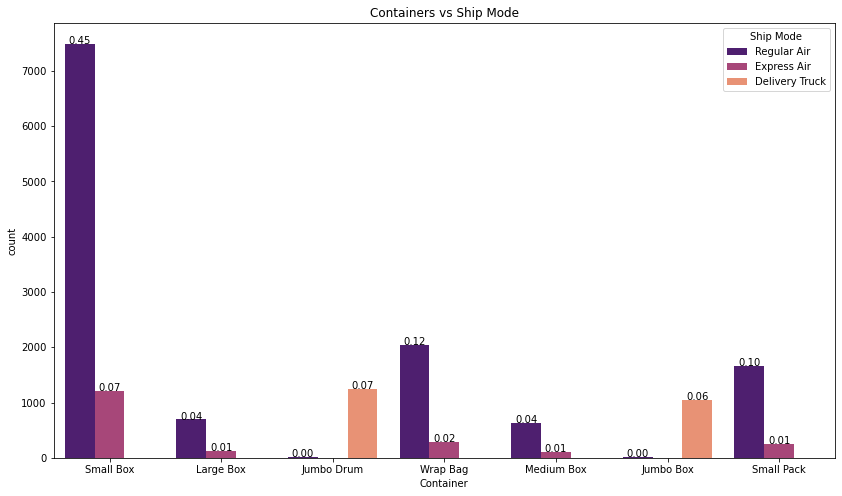

In [57]:
import seaborn as sns

plt.figure(figsize=(14, 8))
ax1 = sns.countplot(x = 'Container', hue = 'Ship Mode', data = data, palette = 'magma')
total = len(data)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Containers vs Ship Mode')
plt.show()

We see that the transport of goods primarily is driven with regular air planes. 

Interestingly, the small box is the most popular container for goods (nearly 50% of all goods are packed with small boxes). 
The wrap bag and small pack are used less and the Jumbo Drum, Jumbo box, Large Box and Medium Box are used very rarely.

The Regular air is the common delivery for all the containers except the jumbo box. The jumbo box and drum are actively delivered by truck.

In [58]:
#Percantage of containers' type according to all the orders
data['Container'].value_counts() / len(data)

Small Box     0.517562
Wrap Bag      0.139064
Small Pack    0.113823
Jumbo Drum    0.074295
Jumbo Box     0.063341
Large Box     0.048339
Medium Box    0.043577
Name: Container, dtype: float64

In [59]:
data['Order packing time'] = data['Ship Date'] - data['Order Date']
data['Order packing time']

0       1 days
1       2 days
2       2 days
3       0 days
4       2 days
         ...  
16793   0 days
16794   2 days
16795   2 days
16796   2 days
16797   2 days
Name: Order packing time, Length: 16798, dtype: timedelta64[ns]

In [69]:
data['Order packing time'] = data['Order packing time'].dt.days

In [72]:
data['Order packing time'].value_counts()

2     6438
1     5312
0     1982
3      780
4      714
7      706
5      636
9      176
6       14
17       6
8        6
11       4
19       4
18       2
31       2
84       2
15       2
24       2
27       2
28       2
92       2
14       2
22       2
Name: Order packing time, dtype: int64

In [76]:
data['Order packing time']=data['Order packing time'].astype('object')

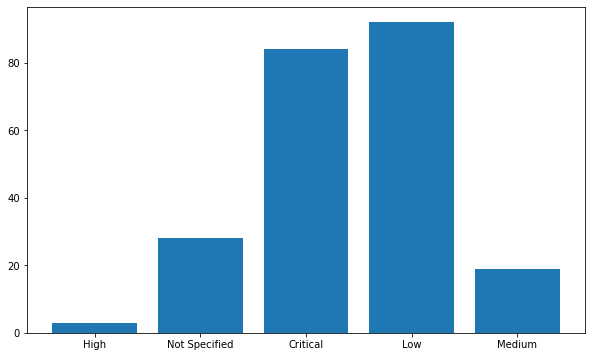

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(data['Order Priority'], data['Order packing time'])
#plt.axis('scaled')
plt.show()

In [73]:
data.to_csv('DINS_data_cleaned.csv')